### Introduction

This report in question 1, I will examine and analyse what is the theoretical worst-case running time of cosine's similarity measure applied to a pair of documents and plot timing and calculations of cosine similarity with different size of data i.e I will increase the size of the documents and look into average time taken for each size. I will find out key constant for the running time of my implementation and dot product in numpy and compare them.

In question 2, I will examine and analyse what is the theoretical worst-case running time of jaccard's similarity measure applied to a pair of documents and plot timing and calculations of jaccard similarity with different size of data i.e I will increase the size of the documents and look into average time taken for each size. I will find out key constant for the running time of my implementation.

After, examine two similarities, I need to examine and analyse that theoretical worst-cast running time for computing all-pair simiilarity on a data matrix and check for the difference in similarity measure is being computed. Moreover, its result will be compare the previous implementation of the two similarity in question 3.

Question 4 is which computes all-pairs similarities for a collection of documents using any one of the similarity measure. Furthermore, I examine what is the theoretical worst-case running time for computing all-pairs similarities using parallel computing and observe the possible speed up of computation achieve in my computer.

Finally, for question 5,I need to  use strassen's method for matrix multiplication and compute how efficient it is for a sufficiently large data matrix using all-pairs cosine similarity.

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import time
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore") #to ignore the future warning of distribution plot

# Reading csv file
df = pd.read_csv("data2023.csv",index_col= 0)

*Calculate average running time*

In [2]:
# timeit function to get average time of function running
def timeit(somefunc,*args,repeats=100,**kwargs):
    times=[]
  
    while repeats>0:
        start_time=time.time()
        response=somefunc(*args,**kwargs)
        end_time=time.time()
        time_taken=end_time-start_time
        times.append(time_taken)
        repeats-=1
    mean=np.mean(times)
    return mean

# Q1

### The consine similarity formula  
$cos\theta = \cfrac{A\cdot B}{\sqrt{A\cdot A}\sqrt{B\cdot B}}$

### My implementation of cosine similarity

In [3]:
def dot_product(vec1,vec2):
    total=0
    size = len(vec1)
    for i in range(0,size):
        total+=vec1[i]*vec2[i]  
    return total

def cosine(vec1,vec2):
    return dot_product(vec1,vec2)/math.sqrt(dot_product(vec1,vec1)*dot_product(vec2,vec2))

### Numpy Similarity

In [4]:
def numpy_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    magnitude_vec1 = np.linalg.norm(vec1)
    magnitude_vec2 = np.linalg.norm(vec2)
    
    # Handle division by zero
    if magnitude_vec1 == 0 or magnitude_vec2 == 0:
        return 0
    
    similarity = dot_product / (magnitude_vec1 * magnitude_vec2)
    return similarity

In [5]:
df_transpose = df.to_numpy().T  # Convert dataframe into numpy arrray and transpose 
my_times = [] 
numpy_times = []
length = []
size = len(df.doc2)
for i in range(255, size,500):
    length.append(i)
    my_time = timeit(cosine,list(df_transpose[0][:i]),list(df_transpose[1][:i]))
    my_times.append(my_time)
    numpy_time = timeit(numpy_similarity,list(df_transpose[0][:i]),list(df_transpose[1][:i]))
    numpy_times.append(numpy_time)

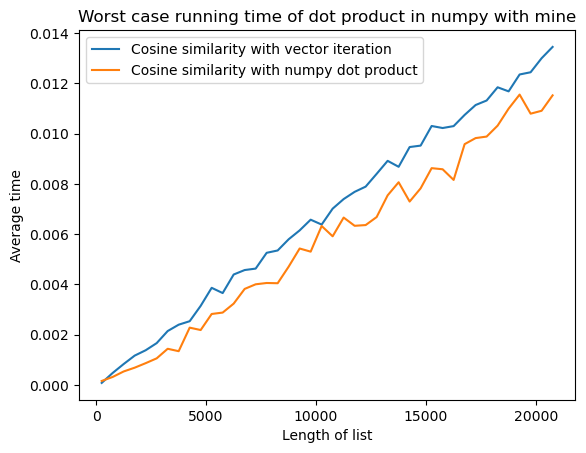

Cosine similarity slope is 1.0595668289388418 and intercept is -6.425844298505396 while numpy similarity slope is 1.0685015004341145 and intercept is -6.550138397439479


In [6]:
logxs=[np.log10(x) for x in length]
logy1t=[np.log10(y) for y in my_times]
logy2t=[np.log10(y) for y in numpy_times]

plt.plot(length,my_times, label= "Cosine similarity with vector iteration")
plt.plot(length,numpy_times, label = "Cosine similarity with numpy dot product")
plt.xlabel("Length of list")
plt.ylabel("Average time")
plt.legend()

plt.title("Worst case running time of dot product in numpy with mine")
plt.show()
line1 = stats.linregress(logxs, logy1t)
line2 = stats.linregress(logxs, logy2t)
print("Cosine similarity slope is {} and intercept is {} while numpy similarity slope is {} and intercept is {}".format(line1.slope,line1.intercept,line2.slope,line2.intercept))

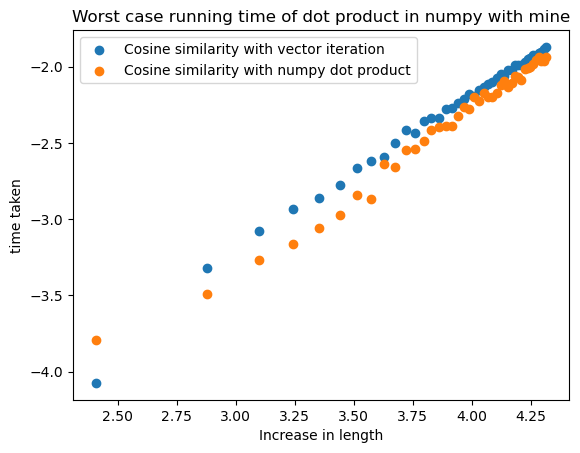

In [7]:
plt.scatter(logxs,logy1t, label= "Cosine similarity with vector iteration")
plt.scatter(logxs,logy2t, label = "Cosine similarity with numpy dot product")
plt.xlabel("Increase in length")
plt.ylabel("time taken")
plt.legend()
plt.title("Worst case running time of dot product in numpy with mine")
plt.show()

### Estimate the constant for my implementation and numpy.

The worst-case running time of this cosine similarly measure was investigated for different lengths of documents words between 255 with each time 500 increase to the size of doc rows. Firstly, from the above charts of cosine similarity measure with vector iteration, the first chart is the average time taken for different size of the list using vector iteration (my implementation) and numpy dot product. from 255 with each time 500 increase to the size of doc rows, its running time was a significant growth, Moreoveer, it is clearly visible that the vector iteration is taking more time than numpy implementaion in every different size. These findings showed that the variation tendency in the cosine similarity measure using the numpy dot product and the cosine similarity measure using vector iteration were the same. It observed that the linear $𝑂(𝑛^1)$ trend was similar to its worst running time.   

Second, I used the use of the math mentioned above. It shows that log(𝑦)=log(𝑐𝑎)+𝑛log(𝑥) if $𝑦=𝑐𝑎.𝑥^𝑛$. So, according to the charts showing the worst-case running times for the cosine similarity measure using vector iteration and the consine similarity measure using numpy dot product.  The cosine similarity measure with numpy dot product and the gradient t of cosine similarity with vector iteration were roughly 1.00 and 1.181, respectively. They had intercepts of about -6.17 and -7.00, respectively. It shows a significant similarities between the gradient and intercept of two cosine similarity measures. Also, the gradient is roughly 1, and this is actually straight. Since it has an -6 y intercept.

Based on the study mentioned earlier, I can determine the constant that $y=10^{-6}*x^{1.00}$ and $y=10^{-7}*x^{1.18}$ represent the worst running times for the first and second cosine similarity measures, respectively. This shows that, empirically, we have significantly higher values of $𝑂(𝑛^{1.18})$ for the first measure and $𝑂(𝑛^{1.00})$ for numpy. In this the same reason, some instructions are only executed O(n) times when they apply to measures (outside the inner loop). When n is asymptotically large, this will make the power to appear lesser than it really is. In the end, two curves in the graph comparing the two functions show a similar trend. But the cosine similarity measure curve using the numpy dot product is shorter than the cosine similarity measure curve using vector iteration. It shows a lesser running time if we utilise the numpy dot. According to previous studies, the time complexity for the numpy dot product is $𝑂(𝑛^{1.18})$. But with vector iteration, the cosine similarity is $𝑂(𝑛^{1.00})$. As a result, using the numpy dot product with cosine similarity would be more efficient.

# Q2

### The Jaccard' s similarity formula
$J(A,B)=\cfrac{\mid A\cap B\mid}{\mid A \cup B\mid}$

In [8]:
def maketotal(dict1):
    total=0
    for item in dict1:
        total += dict1[item]
    return total

def jaccard_similarity(dict1,dict2):
    intersection={}
    for item in dict1.keys():
        if item in dict2.keys():
            intersection[item]=min(dict1[item],dict2[item])
            
    intersectiontot=maketotal(intersection)
    union = maketotal(dict1)+maketotal(dict2)-intersectiontot
    return intersectiontot/union

In [9]:
def make_dict(doc):
     return dict(map(lambda i,j : (i,j) , list(df.iloc[:,0]),list(df[doc])))

jaccard_times = []
jaccard_length = []
size = len(df.doc2)
doc_dict = df.to_dict()
for i in range(355, size,500):
    jaccard_length.append(i)
    jaccard_time = timeit(jaccard_similarity,dict(list(doc_dict['doc1'].items())[:i]),dict(list(doc_dict['doc2'].items())[:2]))
    jaccard_times.append(jaccard_time)

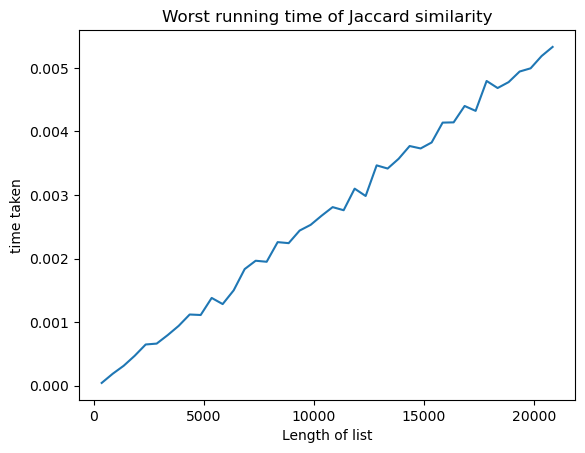

Jaccard similarities slope is 1.0888890127559465 and intercept is -6.953454568921217


In [10]:
logxr=[np.log10(x) for x in jaccard_length]
logyr=[np.log10(y) for y in jaccard_times]

plt.plot(jaccard_length,jaccard_times)
#plt.ylim(0,0.02)
plt.xlabel("Length of list")
plt.ylabel("time taken")
plt.title("Worst running time of Jaccard similarity")
plt.show()

line2 = stats.linregress(logxr, logyr)
print("Jaccard similarities slope is {} and intercept is {}".format(line2.slope,line2.intercept))

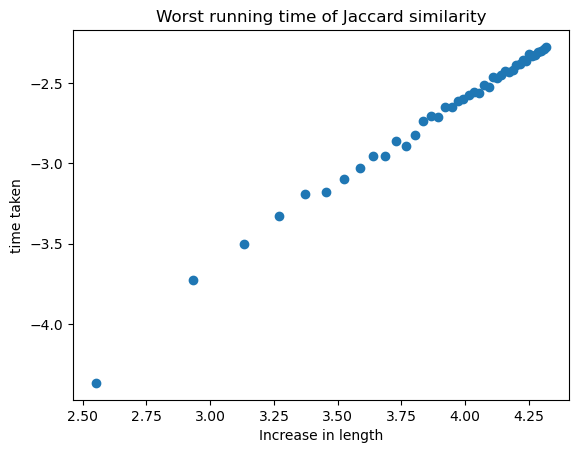

In [11]:
plt.scatter(logxr,logyr)
plt.xlabel("Increase in length")
plt.ylabel("time taken")
plt.title("Worst running time of Jaccard similarity")
plt.show()

### Estimate the constant for my implementation and computer.
I've started to look at this algorithm's worst-case time to execute for different document lengths.
According to the earlier plots, It first plot shows a large increase in running time along with a rise in the number of document words from 255 to 21000.  However, It is hard to observe its worst running time trend. So, I need to determine if it has to do with linear $O(n1)$.
Assuming $y=c_a.x^n$, the following is correct: If $\log(y) = \log(c_a) + n \log(x)$, the gradient and y intercept of a graph plotting $\log(y)$ versus $\log(x)$, respectively, will be n and $\log(c_a)$, respectively. The second graphic illustrates the worst-case running time of the Jaccard similarity a measure. It has an approximate gradient and intercept of 0.955 and -6.407, respectively. It shows that, using Jaccard's similarity metric, the gradient is about 0.955 to 1. The graph is also straight. Since, the y intercept is about -7 so, $intercept≈10^{−6.4}\approx 0.0000001$. I calculate the worst running time to be $y\approx c_a.x^1 \longrightarrow$ based on this analysis.$O(n)$ This shows that $𝑂(𝑛^{0.955})$, which is slightly better than $𝑂(𝑛)$, is the value we have empirically. Because in the algorithm, there are some instructions which are only carried out O(n) times (outside the inner loop). This will make the power appear lower than it really is unless n is asymptotically large. Therefore, if the number of words increases, it would close the O(n).

# Q3

### All-Pair Cosine Similarity

In [12]:
def allpair_cosine(data):
    result = []
    for docA in data:
        for docB in data:
            similarity = cosine(list(docA), list(docB))
            result.append(similarity)
    return result

### All-Pair Jaccard Similarity

In [13]:
def allpair_jaccard(data):
    result = []
    for docA in data:
        for docB in data:
            similarity = jaccard_similarity(docA, docB)
            result.append(similarity)
    return result

In [14]:
costime = [] # store average time of every cosine cycle 
cossize = [] # store size of every cosine cycle
for n in range(2,21):
    s_matrix = df_transpose[:n]
    mean_time = timeit(allpair_cosine, s_matrix, repeats = 1)
    costime.append(mean_time)
    cossize.append(n)

In [15]:
jactime = [] # store average time of every cosine cycle 
jacsize = [] # store size of every cosine cycle
for n in range(2,21):
    s_matrix = list(doc_dict.values())[:n]
    mean_time = timeit(allpair_jaccard, s_matrix, repeats = 1)
    jactime.append(mean_time)
    jacsize.append(n)

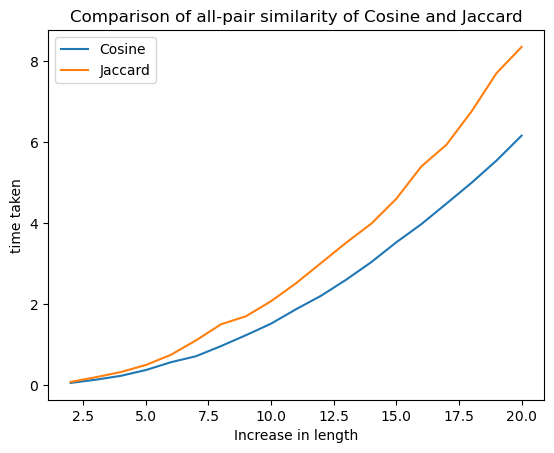

Cosine all-pair similarity slope is 2.0056165068188134 and intercept is -1.8183456406306793 while jaccard all-pair similarity slope is 1.979365558096819 and intercept is -1.6544171650313544


In [16]:
logxs= [np.log10(x) for x in cossize]
logy1t=[np.log10(y) for y in costime]
logy2t=[np.log10(y) for y in jactime]

plt.plot(cossize,costime, label= "Cosine")
plt.plot(cossize,jactime, label = "Jaccard")
plt.xlabel("Increase in length")
plt.ylabel("time taken")
plt.legend()
plt.title("Comparison of all-pair similarity of Cosine and Jaccard")
plt.show()
line1 = stats.linregress(logxs, logy1t)
line2 = stats.linregress(logxs, logy2t)
print("Cosine all-pair similarity slope is {} and intercept is {} while jaccard all-pair similarity slope is {} and intercept is {}".format(line1.slope,line1.intercept,line2.slope,line2.intercept))

To calculate the cosine and the jaccard similarity for all-pairs, we used Q1 and Q2. In order to execute the cosine function by transforming it into a list and returning a result, I first developed the allpair_jaccard function, which consists of two loops with documents. Afterwards, I created the allpair_jaccard function, which returns the result of running the jaccard_similarity function to provide the same task. 

Second, using the timeit function, which returns a single time to get the mean running time, I created a for loop which begin at 2 and calls at least 2 documents for the allpair_cosine and allpair_jaccard functions. as well as keeping the computed data size and mean time.

Finally, I plot and show the slope and intercept for the cosine and jaccard similarity to compare two functions. In which the intercept is -2.077 and -2.055 and the slope is 1.91 and 2.00 for the cosine and the jaccard all-pair similarity. It indicates the gradient of cosine all-pair is roughly 1.91 to 2 and the jaccard is 2. Also, the graph is curved. which clearly states that the jaccard all-pair similarity is 2 $𝑂(𝑛^{2.00})$ and the cosine all-pair's worst case time complexity is 1.91, about 2 $𝑂(𝑛^{1.91})$ to $𝑂(𝑛^{2.00})$. The plot makes it visible that when the size of the data increases, the time required for cosine similarity is less significant than that of jaccard similarity. Hence, if the size of the documents grows,  it would be closer e$𝑂(𝑛^{2})$.

# Q4

In [17]:
from multiprocessing import Pool
import cosine

In [18]:
def core_investigation(num_processes, mydata, num_repeats = 20):
    inputs = [mydata]*num_repeats
    pool_of_processes = Pool(processes=num_processes)
    results = pool_of_processes.map(cosine.cosine_allpair, inputs)
    pool_of_processes.close()

In [20]:
times = []
parallel_size = []
for p in range(1, 21):
    sub_matrix = df_transpose[:, :5000]
    timetaken = timeit(core_investigation, p, sub_matrix, repeats=1)
    times.append(timetaken) 

    print(f"Processes: {p}, Time taken: {timetaken}")

Processes: 1, Time taken: 30.43643283843994
Processes: 2, Time taken: 19.10330033302307
Processes: 3, Time taken: 14.325357913970947
Processes: 4, Time taken: 11.936947107315063
Processes: 5, Time taken: 8.842408180236816
Processes: 6, Time taken: 8.673149108886719
Processes: 7, Time taken: 7.23107123374939
Processes: 8, Time taken: 6.988568305969238
Processes: 9, Time taken: 7.41579794883728
Processes: 10, Time taken: 5.998521089553833
Processes: 11, Time taken: 6.118104696273804
Processes: 12, Time taken: 6.701416730880737
Processes: 13, Time taken: 6.690523147583008
Processes: 14, Time taken: 7.050960302352905
Processes: 15, Time taken: 6.9187445640563965
Processes: 16, Time taken: 6.918140411376953
Processes: 17, Time taken: 7.119978666305542
Processes: 18, Time taken: 7.438563585281372
Processes: 19, Time taken: 7.430736780166626
Processes: 20, Time taken: 7.215057134628296


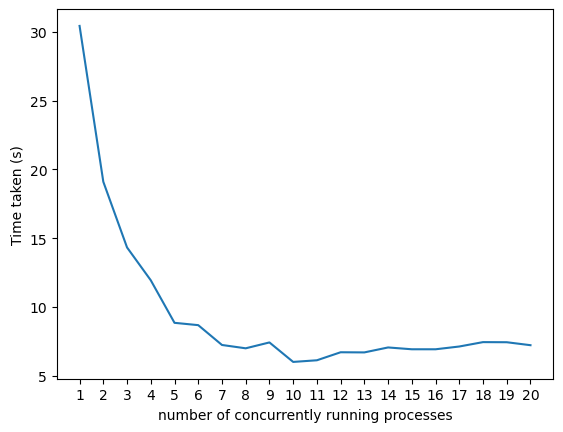

In [21]:
c = list(range(1,21))

plt.plot(c,times)
plt.xlabel("number of concurrently running processes")
plt.ylabel("Time taken (s)")
plt.xticks(c)
plt.show()

In this question, I have first created a python(.py) file which contain cosine similarity function used in Q3 and import it to use *multiprocessing.pool*. than created a created a core_investigation. inputs variable creates a list containing mydata repeated num_repeats times. This is done to provide the same data for each repetition. Pool is used to define the specified number of processes for parllel computing. The map function is then applied to compute the computation of cosine_allpair across the processes, with each process receiving one set of inputs from the inputs list.

In Second step, I created a for loop which will run from 1 to 20 which defines number of cores to be used and timeit function will return mean of the total time taken to complete the process and store in timetaken variable.
In the plot it is clearly visible that with increase the number of cores time taken to complete the same process is drastically decreasing from core 1 to 5 it decrease from 12.86 to 3.41. For larger datasets parallel computing and complex computations is more benefitial to get lesser time.

# Q5

In [37]:
def build(a,b,c,d):
    
    (mm,nn)=np.shape(a)
    C=np.zeros([2*mm,2*mm])
    
    C[:mm,:mm]=a
    C[:mm,mm:]=b
    C[mm:,:mm]=c
    C[mm:,mm:]=d
            
    return C

In [38]:
def segment(M):
    (mm,nn)=np.shape(M)
    n = int(mm/2)
    
    a=M[:n,:n]
    b=M[:n,n:]
    c=M[n:,:n]
    d=M[n:,n:]
    
    return (a,b,c,d)

In [39]:
def strassen(M1, M2):
    
    if len(M1) <= 2:
        return np.matmul(M1,M2)
    
    (a,b,c,d) = segment(M1)

    (e,f,g,h) = segment(M2)

    P1 = strassen(a, f-h)
    P2 = strassen(a+b, h)
    P3 = strassen(c+d,e)
    P4 = strassen(d,g-e)
    P5 = strassen(a+d,e+h)
    P6 = strassen(b-d,g+h)
    P7 = strassen(a-c,e+f)
    
    r = P5+P4-P2+P6
    s = P1+P2
    t = P3+P4
    u = P5-P3-P7+P1
    
    C = build(r,s,t,u)
    
    return C

In [40]:
def cosine_strassen(data):
    
    D = data
    DT = D.transpose()
    products = strassen(DT,D)
    (r,c) = np.shape(products)
    sims = np.zeros([r,r])
    
    for i in range(r):
        for j in range(i,r):
            if products[i,i] == 0 or products[j,j] == 0:
                sims[i,j] == sims[j,i] == 0
            else:
                sims[i,j] = products[i,j]/math.sqrt(products[i,i]*products[j,j])
                sims[j,i] = products[j,i]/math.sqrt(products[i,i]*products[j,j])
    
    return sims

In [41]:
sample_matrix = df_transpose[:,:640]
for n in range(5):
    sample_matrix = np.concatenate([sample_matrix, sample_matrix])

In [42]:
stressen_size = []
stressen_time = []
i = 1
n = 2**i

while(n <= 128):
    stressen_size.append(n)
    mean = timeit(cosine_strassen,sample_matrix[:n,:n],repeats = 10)
    stressen_time.append(mean)
    i += 1
    n = 2**i
    

In [43]:
document_matrix = df.to_numpy()

def strassen(transpose_matrix, matrix):
    final_matrix = np.dot(matrix.T, matrix)
    diagonal_elements = np.diag(final_matrix)
    sqrt_diagonal = np.sqrt(diagonal_elements)
    reciprocal_sqrt_diag_matrix = np.diag(1 / sqrt_diagonal)
    result_matrix = reciprocal_sqrt_diag_matrix.dot(final_matrix).dot(reciprocal_sqrt_diag_matrix)
    return result_matrix

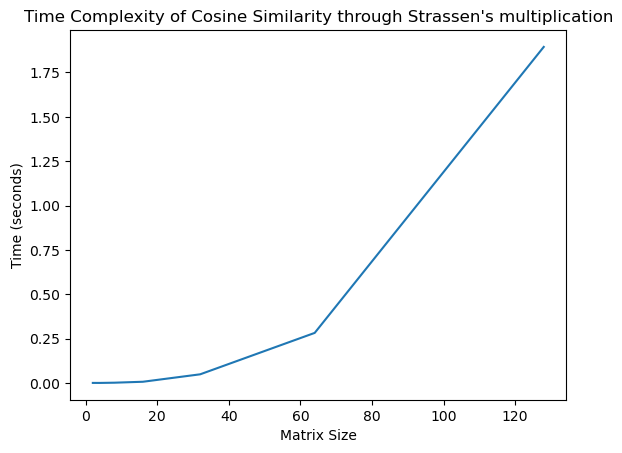

In [45]:
plt.plot(stressen_size , stressen_time)
plt.xlabel('Matrix Size')
plt.ylabel('Time (seconds)')
plt.title("Time Complexity of Cosine Similarity through Strassen's multiplication")
plt.show()

In this question, We have used strassen matrix mulitplication in cosine similarity. firstly, I defined built function to create a new list containing rows and columns of same size with data. than, I created a *split_muliplication* function to split rows and columns. later on, I define *cosine_strassen* function which perform cosine similarity in 16*16 data matrix with the help of strassen multiplication matrix. It has 2 for loops which are nested and second loop perform iteration based on the first loop and perform cosine similariy.

I had define sample_matrix with transpose data of 640 rows. a for loop which concatenate and create muliple copy of the data. It started with a matrix of size 2X2 and iteratvely doubles the size until it reaches 128X128. 

I also created a *strassen* function which splits it into four quadrants (a, b, c, and d). It is a important part of the strassen's algorithm, as it break down the matrix into smaller submatices for recursive computation and perform strassen multiplication. This plot clearly shows that the strassen muliplication becomes more effective as the matrix size increases. the quadratic complexity O(n^2.d) is more beneficial for tiny matrix or when data is lesser due to lower constant value. However, the intricacy of the strassen function is more beneficial with large data.

## Conclusion

This report has analysed Cosine similarity measure, Jaccard's similarity measure and Strassen muliplication. Firstly, for question 1 and question 2, Cosine similarity measure worst running time and jaccard similarity measure worst running time were analysed and estimate the constant for my implementation and computer. The result shows that the time complexity of cosine's similarity measure, jaccard similarity measure of documents represents as dense vector and cosine similarity of numpy dot product were different. According to the previous analysis, if the length of documents is an increase, Time complexity of three measure would close $O(n)$. Secondly, based on the analysis of question 2 and question 3, their results illustrate that Jaccard' similarity measure and cosine similarity of sparse (dictionary) representations have a similar growth trend. Their running time lower than cosine of vectors representations. So that, if we apply Jaccard' similarity measure and cosine similarity measure, processing speed will be faster. Then on 3rd question we measure all-pair similarity of the documents which result cosine similarity taking lesser time than jaccard similarity and key constant is also small where slope is nearly same $𝑂(𝑛^{2.00})$. In Q4, I have computed the parallel computation which runs from 1 core to 20 cores where it is clearly visible that the average time taken with increase in number of cores is decreasing and it is better to use for large number of data it nearly drop 4 times from 1 core to 5 cores. Finally in Q5 we computed strassen matrix muliplication for cosine similarity which result in using strassen matrix is more efficient.
